In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras


from sklearn.metrics import confusion_matrix , classification_report

In [105]:
import warnings
warnings.filterwarnings('ignore')

# read dataset

In [106]:
df = pd.read_csv("C:\\Users\\Md Moradul Siddique\\Documents\\data\\sonar_dataset.csv", header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M
157,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,...,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036,M
51,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,...,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,R
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M


In [107]:
df.shape   #shape of dataset

(208, 61)

In [108]:
# check for nan values 
df.isna().sum()  

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [109]:
df.columns  #show column

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [110]:
df[60].value_counts()  #how much mine & rock

M    111
R     97
Name: 60, dtype: int64

In [128]:
df.groupby(60).size()

60
M    111
R     97
dtype: int64

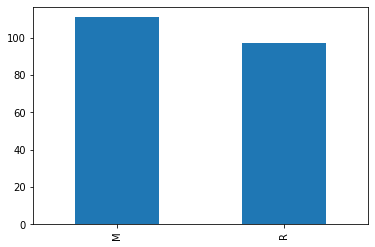

In [111]:
df[60].value_counts().plot(kind='bar')

In [112]:
#drop the column
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [113]:
#Convert categorical variable into dummy/indicator variables
y=pd.get_dummies(y,drop_first=True)
y.sample(10)  # R --> 1 and M --> 0

,R
126,0
108,0
163,0
31,1
60,1
137,0
175,0
97,0
26,1
64,1


In [114]:
y['R'].value_counts()  #count category

0    111
1     97
Name: R, dtype: int64

In [115]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [116]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=1)

In [117]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063


# Using Deep learning without Dropout Layer

In [118]:
model = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.4929
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5360
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6750 - accuracy: 0.5442
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6365 - accuracy: 0.6208
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6984
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6702
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5547 - accuracy: 0.7866
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.7483
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7938
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.7819
Epoch 11/

In [119]:
cl=model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 0s/step - loss: 1.1126 - accuracy: 0.7692


AttributeError: 'list' object has no attribute 'history'

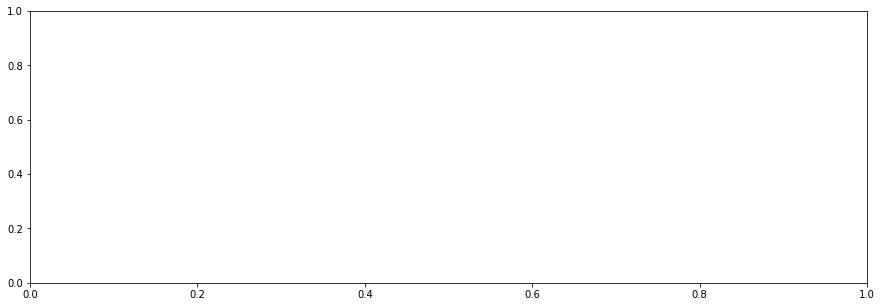

In [120]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(cl.history['accuracy'], label='accuracy')
plt.plot(cl.history['val_accuracy'], label='val_accuracy', linestyle='--')
plt.plot(cl.history['loss'], label='loss')
plt.plot(cl.history['val_loss'], label='val_loss', linestyle='--')
plt.legend()

In [121]:
y_pred = model.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[1.2028487e-07 9.9919212e-01 9.9943984e-01 7.2644354e-05 9.9999982e-01
 9.9999315e-01 3.3301586e-01 1.0000000e+00 6.5849825e-05 1.0000000e+00]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 1.]


In [122]:
y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [123]:
#confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.81      0.68      0.74        25

    accuracy                           0.77        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



# Model with Dropout Layer

In [124]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=60, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.7657 - accuracy: 0.5066
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5889
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7307 - accuracy: 0.4823
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.5996
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7252 - accuracy: 0.4224
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.5163
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7393 - accuracy: 0.4097
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4891
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4861
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4530
Epoch 11/

In [125]:
modeld.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.4566 - accuracy: 0.7500


[0.4566311240196228, 0.75]

Improved Test Accuracy 

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.81      0.68      0.74        25

    accuracy                           0.77        52
   macro avg       0.78      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



You can see that by using dropout layer test accuracy increased from .71 to .77